# EXPLORATORY ESPOL DATA ANALYSIS 

## ESPOL DATA

Importamos todas las librerías necesarias.

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import os
import plotly.express as px
import cufflinks as cf
from IPython.display import display,HTML
import plotly.graph_objects as go


Permite ver todas las columanas del data

In [3]:
pd.set_option('display.max_columns', 30)

Leemos los datos con la función de pandas 'pd.read_cs'.

In [4]:
df_H_p = pd.read_csv('data.csv')

In [5]:
df_H_p

,ANIO,TERMINO,DIA,HORAINICIO,HORAFIN,NOMBRE,CODIGOMATERIA,PARALELO,ESQUINCENA,CAPACIDAD,CUPOPLANIFICADO,MODALIDAD,UNIDAD,TIPOMATERIA,DOCENTE,EMAIL,AULA,BLOQUE,CAMPUS
0,2023,0S,miércoles,9:00:00 a. m.,11:00:00 a. m.,PRODUCCIÓN VEGETAL I,AGRG1032,"1,00",N,"5,00","5,00",PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO
1,2023,0S,lunes,9:00:00 a. m.,12:00:00 p. m.,PRODUCCIÓN VEGETAL I,AGRG1032,"1,00",N,"5,00","5,00",PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO
2,2023,0S,miércoles,2:00:00 p. m.,4:00:00 p. m.,DIAGNÓSTICO Y PROTECCIÓN VEGETAL I,AGRG1025,"1,00",N,"5,00","5,00",PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME002,EMAIL002,A106,3H,CAMPUS GUSTAVO GALINDO
3,2023,0S,lunes,2:00:00 p. m.,5:00:00 p. m.,DIAGNÓSTICO Y PROTECCIÓN VEGETAL I,AGRG1025,"1,00",N,"5,00","5,00",PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME002,EMAIL002,A106,3H,CAMPUS GUSTAVO GALINDO
4,2023,0S,lunes,9:00:00 a. m.,12:00:00 p. m.,TÉCNICAS DIETÉTICAS,NUTG2042,"1,00",N,"20,00","20,00",PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME003,EMAIL003,A101,3H,CAMPUS GUSTAVO GALINDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2023,0S,miércoles,2:00:00 p. m.,5:00:00 p. m.,INGLÉS V,IDIG1010,"104,00",N,"30,00","30,00",PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME029,EMAIL029,A104,9F,CAMPUS GUSTAVO GALINDO
123,2023,0S,martes,3:30:00 p. m.,5:00:00 p. m.,INGLÉS IV,IDIG1009,"104,00",N,"30,00","30,00",PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME028,EMAIL028,A005,9F,CAMPUS GUSTAVO GALINDO
124,2023,0S,martes,3:30:00 p. m.,5:00:00 p. m.,INGLÉS V,IDIG1010,"104,00",N,"30,00","30,00",PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME029,EMAIL029,A104,9F,CAMPUS GUSTAVO GALINDO
125,2023,0S,miércoles,2:00:00 p. m.,5:00:00 p. m.,INGLÉS V,IDIG1010,"105,00",N,"30,00","30,00",PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME030,EMAIL030,A105,9F,CAMPUS GUSTAVO GALINDO


## TREEMAP _ SCATTER _ HORARIO DE CLASES 


Desarrollo de idea.

Modificar la columnas que contengan hora a un formato optimo ,para luego realizar la respectiva conversión  a formato fecha y hora con datetime.

In [6]:

def convert_time(df,feature):
    li = []
    for x in df[feature]:
        li_ho = x.split(' ')
        if 'a' in li_ho[1]:
            li_t = li_ho[0].split(':')
            if len(li_t[0]) == 1:
                n = '0'+li_ho[0] + 'AM'
                li.append(n)
            elif len(li_t[0]) > 1:
                n = li_ho[0] + 'AM'
                li.append(n)

        elif 'p' in li_ho[1]:
            li_t = li_ho[0].split(':')
            if 1 == len(li_t[0]):
                n = '0' + li_ho[0] + 'PM'
                li.append(n)
            elif len(li_t[0]) > 1:
                n = li_ho[0] + 'PM'
                li.append(n)

    df[feature] = li

Llamamos la función, no la asignamos a nada porque la función solo me actualiza, más no me retorna nada.

In [7]:
convert_time(df_H_p,'HORAINICIO')
convert_time(df_H_p,'HORAFIN')

Convertimos la columnas que tengan horas a formato hora y asi poder encontrar la duración  de cada clase, al restar la columna 'HORAFIN' con 'HORAINICIO'.

In [8]:
import datetime as dt
df_H_p['HORAINICIO'] = pd.to_datetime(df_H_p['HORAINICIO'],format="%I:%M:%S%p")
df_H_p['HORAFIN'] = pd.to_datetime(df_H_p['HORAFIN'],format="%I:%M:%S%p")
df_H_p['DURACION'] = (df_H_p['HORAFIN']-df_H_p['HORAINICIO'])
df_H_p['HORAINICIO'] = [dt.datetime.strptime(str(t),'%Y-%m-%d %H:%M:%S').time() for  t in df_H_p['HORAINICIO']]
df_H_p['HORAFIN'] = [dt.datetime.strptime(str(t),'%Y-%m-%d %H:%M:%S').time() for  t in df_H_p['HORAFIN']]
df_H_p['DURACION'] = [(str(d).split('s')[1].strip()) for d in df_H_p['DURACION']]

Cambiamos el formato de ciertas columnas para pasarlas a tipo entero.

In [9]:
def convert_int(df,name_column):
    df[name_column] = [(n.split(",")[0])for n in df[name_column]]
    df[name_column] = df_H_p[name_column].astype(int)
    return df

for column in ['PARALELO','CAPACIDAD','CUPOPLANIFICADO']:
    convert_int(df_H_p,column)

Clasificamos por curso:

Saber que un curso en espol ,la mayoría de veces se compone de una parte teórica y otra parte práctica , por  lo tanto también realizamos su clasificación en una columna llamada 'CLASE', donde solo hay dos valores único o es 'Teórico' o es 'Practico'.

La materia de TÉCNICAS DIETÉTICAS tiene un solo paralelo de teórico, pero dos de practico donde la mitad de los alumnos va a uno y la otra mitad al otro, fuente:  https://www.academico.espol.edu.ec/UI/Registros/MateriaPlanificada.aspx?idMateria=6973&numeroParalelo=1&p=587&idCurso=159345 ,  no obstante, se puede ver el caso de dos materias donde existe un solo curso teórico, pero este  a su vez se divide en varios prácticos.

Las materias en cuestión son : 
* Principios de electrónica.

* Sistemas Digitales.

In [10]:
cond=[df_H_p['PARALELO'] ==100,df_H_p['PARALELO'] ==101,df_H_p['PARALELO']==102,df_H_p['PARALELO']==103,df_H_p['PARALELO']==104,df_H_p['PARALELO']==105,df_H_p['PARALELO']==106]
result=[1,1,2,3,4,5,6]
df_H_p['COURSE']=np.select(cond,result,default=df_H_p['PARALELO'])
#solo tiene un paralelo
df_H_p['COURSE'][np.isin(df_H_p['NOMBRE'],['SISTEMAS DIGITALES I','PRINCIPIOS DE ELECTRÓNICA'])] = 1
cond=[df_H_p['PARALELO']>=100,df_H_p['PARALELO']<100]
result=['Práctico','Teórico']
df_H_p['CLASE']=np.select(cond,result)

### Mapa

Desarrollo de idea.

Trabajamos con los puntos actuales del mapa, pero con un mapa de fondo no actualizado

In [11]:

dic_ubi={
    '9M':[-2.14662, -79.96666],
    '3H':[-2.1523, -79.95582],
    'GEA':[-2.14016, -79.96282],
    '13B':[-2.14558, -79.96507],
    '7B':[-2.14704, -79.96609] ,
    '11A':[-2.14463, -79.96759],
    '8F':[-2.14878, -79.96752],
    '8E':[-2.14873, -79.96782],
    '9F':[-2.14715, -79.96778],
    '11C':[-2.14563, -79.96683],
    '11D':[-2.14544, -79.96601],
    '3K':[-2.15122, -79.95424],
}

In [12]:
df_H_p['BLOQUE']=[(i.strip())for i in df_H_p['BLOQUE']]
df_H_p['lat']=[(dic_ubi[bl][0])for bl in df_H_p['BLOQUE']]
df_H_p['lon']=[(dic_ubi[bl][1])for bl in df_H_p['BLOQUE']]

### PROCESOS INTERNO DEL DASH

Convertir la tabla filtrada y procesos para la realización del treemap.


In [13]:
#df_H_p.to_csv('df_Treemap_scatter.csv')

In [14]:
df_H_p.CAMPUS.nunique()

1

A continuación, se muestra los procesos realizados dentro del archivo.py  (DASH) 

#### Treemap

In [15]:
#Esto es para mejorar el treemap , va dentro del archivo .py
"""
dias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves','viernes']
clase_orden = ['Teórico','Práctico']
df_H_p.DIA = pd.Categorical(df_H_p['DIA'], dias_ordenados)
df_H_p.CLASE = pd.Categorical(df_H_p['CLASE'], clase_orden)
df_H_p.sort_values('DIA', inplace=True)
df_H_p.sort_values('CLASE', inplace=True)
cond=[df_H_p['COURSE']==1,df_H_p['COURSE']==2,df_H_p['COURSE']==3,df_H_p['COURSE']==4,df_H_p['COURSE']==5]
res=['COURSE 1','COURSE 2','COURSE 3','COURSE 4','COURSE 5']
df_H_p['COURSE'] = np.select(cond,res,default=df_H_p['COURSE'])
df_H_p['COURSE'] = pd.Categorical(df_H_p['COURSE'], res)
df_H_p.sort_values('COURSE', inplace=True)
h_inicial= dt.datetime(2023, 1, 1, 9, 0, 0)
h_final=dt.datetime(2023, 1, 1, 17, 1, 0)
mediahora=dt.timedelta(minutes=30)
time_30min =[(str(x).split('T')[1]).split('.')[0] for x in np.arange(h_inicial,h_final,mediahora)]"""

"\ndias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves','viernes']\nclase_orden = ['Teórico','Práctico']\ndf_H_p.DIA = pd.Categorical(df_H_p['DIA'], dias_ordenados)\ndf_H_p.CLASE = pd.Categorical(df_H_p['CLASE'], clase_orden)\ndf_H_p.sort_values('DIA', inplace=True)\ndf_H_p.sort_values('CLASE', inplace=True)\ncond=[df_H_p['COURSE']==1,df_H_p['COURSE']==2,df_H_p['COURSE']==3,df_H_p['COURSE']==4,df_H_p['COURSE']==5]\nres=['COURSE 1','COURSE 2','COURSE 3','COURSE 4','COURSE 5']\ndf_H_p['COURSE'] = np.select(cond,res,default=df_H_p['COURSE'])\ndf_H_p['COURSE'] = pd.Categorical(df_H_p['COURSE'], res)\ndf_H_p.sort_values('COURSE', inplace=True)\nh_inicial= dt.datetime(2023, 1, 1, 9, 0, 0)\nh_final=dt.datetime(2023, 1, 1, 17, 1, 0)\nmediahora=dt.timedelta(minutes=30)\ntime_30min =[(str(x).split('T')[1]).split('.')[0] for x in np.arange(h_inicial,h_final,mediahora)]"

#### Scatter Plot

Función previa para ver que materias solo tiene parte teórica, por consiguiente en el dash solo mostrar eso.

In [16]:
def onlyteoric(df):
    st=df_H_p.NOMBRE[df_H_p.TIPOMATERIA == 'teórica'].unique().tolist()
    return st #solo teórico parte teórica
st=onlyteoric(df_H_p)

Scatter Plot donde se represente los horarios de entrada y salida de cada course.

In [17]:
dff = df_H_p[df_H_p['UNIDAD']=='Facultad de Ingeniería en Electricidad y Computación']
dff = dff[dff['NOMBRE']=='PRINCIPIOS DE ELECTRÓNICA']
dff = dff[dff['COURSE']=='COURSE 1']
dff = dff[dff.CLASE=='Práctico']

In [18]:
#Esto va dentro del dash en la seccion de scatter plot sobre horario de clase
"""df_horarios = pd.DataFrame(columns=['HORARIOS','INDICADOR','SIZE','PARALELO','DIA','CLASE','AULA'])
def armar_dataset(colum):
    return list(dff[colum]) + list(dff[colum])
df_horarios.HORARIOS = list(dff.HORAINICIO ) + list(dff.HORAFIN ) 
df_horarios.INDICADOR = ['INGRESO']* dff.shape[0]+ ['SALIDA']* dff.shape[0]
df_horarios['SIZE'] =[10]*df_horarios.shape[0]
columns = list(df_horarios.columns)
for x in [0]*3:
    columns.pop(x)
for colum in columns:
    df_horarios[colum] = armar_dataset(colum)
#ORDENAR LAS FECHAS 
dias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves','viernes']
df_horarios.DIA = pd.Categorical(df_horarios['DIA'], categories =dias_ordenados,ordered=True)
df_horarios.sort_values('DIA',ascending=True)
df_horarios.HORARIOS = pd.to_datetime(df_horarios.HORARIOS ,format="%X")"""

#df_horarios.HORARIOS=[str(t).split(" ")[1] for  t in df_horarios['HORARIOS']]

'df_horarios = pd.DataFrame(columns=[\'HORARIOS\',\'INDICADOR\',\'SIZE\',\'PARALELO\',\'DIA\',\'CLASE\',\'AULA\'])\ndef armar_dataset(colum):\n    return list(dff[colum]) + list(dff[colum])\ndf_horarios.HORARIOS = list(dff.HORAINICIO ) + list(dff.HORAFIN ) \ndf_horarios.INDICADOR = [\'INGRESO\']* dff.shape[0]+ [\'SALIDA\']* dff.shape[0]\ndf_horarios[\'SIZE\'] =[10]*df_horarios.shape[0]\ncolumns = list(df_horarios.columns)\nfor x in [0]*3:\n    columns.pop(x)\nfor colum in columns:\n    df_horarios[colum] = armar_dataset(colum)\n#ORDENAR LAS FECHAS \ndias_ordenados = [\'lunes\', \'martes\', \'miércoles\', \'jueves\',\'viernes\']\ndf_horarios.DIA = pd.Categorical(df_horarios[\'DIA\'], categories =dias_ordenados,ordered=True)\ndf_horarios.sort_values(\'DIA\',ascending=True)\ndf_horarios.HORARIOS = pd.to_datetime(df_horarios.HORARIOS ,format="%X")'

In [19]:
#df_horarios

## MAPA

Continuar con la idea 

Primero creamos un nuevo data frame, que nos ayudar para hacer scatter_mapbox, lo hacemos con un groupby.

In [20]:
pd.set_option('display.max_columns',30)


In [21]:
df_mapa = df_H_p[['UNIDAD','NOMBRE','BLOQUE','CAPACIDAD','CLASE','lat','lon']].groupby(['UNIDAD','NOMBRE', 'BLOQUE','CAPACIDAD','CLASE','lat','lon'], as_index= False).count()
df_mapa

,UNIDAD,NOMBRE,BLOQUE,CAPACIDAD,CLASE,lat,lon
0,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,13B,38,Práctico,-2.14558,-79.96507
1,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,13B,38,Teórico,-2.14558,-79.96507
2,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,7B,38,Práctico,-2.14704,-79.96609
3,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,7B,38,Teórico,-2.14704,-79.96609
4,Facultad de Ciencias Naturales y Matemáticas,CIENCIAS DE LA SOSTENIBILIDAD,9M,30,Teórico,-2.14662,-79.96666
5,Facultad de Ciencias Naturales y Matemáticas,CÁLCULO DE UNA VARIABLE,9M,30,Práctico,-2.14662,-79.96666
6,Facultad de Ciencias Naturales y Matemáticas,CÁLCULO DE UNA VARIABLE,9M,30,Teórico,-2.14662,-79.96666
7,Facultad de Ciencias Naturales y Matemáticas,CÁLCULO VECTORIAL,9M,30,Práctico,-2.14662,-79.96666
8,Facultad de Ciencias Naturales y Matemáticas,CÁLCULO VECTORIAL,9M,30,Teórico,-2.14662,-79.96666
9,Facultad de Ciencias Naturales y Matemáticas,ESTADÍSTICA,9M,30,Práctico,-2.14662,-79.96666


In [22]:
def normalizar_lat(df,bloque,lat):
    modiCor=[] #modificador de coordenadas
    compa=[]  #compara si ya están
    cont=0
    for bloque,lo in zip (df[bloque],df[lat]):
        if bloque not in compa:
            compa.append(bloque)
            modiCor.append(lo)
        else:
            cont=cont+0.0000009
            modiCor.append(lo-cont)
    
    df[lat+'2']=modiCor

def normalizar_lon(df,bloque,lon):
    modiCor=[]
    compa=[]
    cont=0
    for bloque,lo in zip (df[bloque],df[lon]):
        if bloque not in compa:
            compa.append(bloque)
            modiCor.append(lo)
        else:
            cont=cont+0.000009
            modiCor.append(lo-cont)
    
    df[lon+'2']=modiCor

normalizar_lon(df_mapa,'BLOQUE','lon')
normalizar_lat(df_mapa,'BLOQUE','lat')

In [23]:
#df_mapa.to_csv('df_Mapa.csv')

In [24]:
df_H_p


,ANIO,TERMINO,DIA,HORAINICIO,HORAFIN,NOMBRE,CODIGOMATERIA,PARALELO,ESQUINCENA,CAPACIDAD,CUPOPLANIFICADO,MODALIDAD,UNIDAD,TIPOMATERIA,DOCENTE,EMAIL,AULA,BLOQUE,CAMPUS,DURACION,COURSE,CLASE,lat,lon
0,2023,0S,miércoles,09:00:00,11:00:00,PRODUCCIÓN VEGETAL I,AGRG1032,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.15230,-79.95582
1,2023,0S,lunes,09:00:00,12:00:00,PRODUCCIÓN VEGETAL I,AGRG1032,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582
2,2023,0S,miércoles,14:00:00,16:00:00,DIAGNÓSTICO Y PROTECCIÓN VEGETAL I,AGRG1025,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME002,EMAIL002,A106,3H,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.15230,-79.95582
3,2023,0S,lunes,14:00:00,17:00:00,DIAGNÓSTICO Y PROTECCIÓN VEGETAL I,AGRG1025,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME002,EMAIL002,A106,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582
4,2023,0S,lunes,09:00:00,12:00:00,TÉCNICAS DIETÉTICAS,NUTG2042,1,N,20,20,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME003,EMAIL003,A101,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2023,0S,miércoles,14:00:00,17:00:00,INGLÉS V,IDIG1010,104,N,30,30,PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME029,EMAIL029,A104,9F,CAMPUS GUSTAVO GALINDO,03:00:00,4,Práctico,-2.14715,-79.96778
123,2023,0S,martes,15:30:00,17:00:00,INGLÉS IV,IDIG1009,104,N,30,30,PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME028,EMAIL028,A005,9F,CAMPUS GUSTAVO GALINDO,01:30:00,4,Práctico,-2.14715,-79.96778
124,2023,0S,martes,15:30:00,17:00:00,INGLÉS V,IDIG1010,104,N,30,30,PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME029,EMAIL029,A104,9F,CAMPUS GUSTAVO GALINDO,01:30:00,4,Práctico,-2.14715,-79.96778
125,2023,0S,miércoles,14:00:00,17:00:00,INGLÉS V,IDIG1010,105,N,30,30,PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME030,EMAIL030,A105,9F,CAMPUS GUSTAVO GALINDO,03:00:00,5,Práctico,-2.14715,-79.96778


## FLUJO DE ESTUDIANTES

In [25]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

### SECCIÓN MATERIAS EN CURSOS


En esa sección, implementaremos un dropdown con todas las horas , y este a su vez te arroja las materias en curso  

In [26]:
def posibles_horas(hi,hf):
    hi = pd.to_datetime(str(hi))
    hf=pd.to_datetime(str(hf))
    l_posibles_horas =[(str(x).split('T')[1]).split('.')[0] for x in np.arange(hi,hf,dt.timedelta(minutes=30))]
    return l_posibles_horas
#

In [27]:
df_H_p['HORAS_POSIBLES'] = [ posibles_horas (hi,hf) for hi,hf in zip(df_H_p.HORAINICIO,df_H_p.HORAFIN)]
df_H_p['HORAS_POSIBLES']


0               [09:00:00, 09:30:00, 10:00:00, 10:30:00]
1      [09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00...
2               [14:00:00, 14:30:00, 15:00:00, 15:30:00]
3      [14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00...
4      [09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00...
                             ...                        
122    [14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00...
123                       [15:30:00, 16:00:00, 16:30:00]
124                       [15:30:00, 16:00:00, 16:30:00]
125    [14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00...
126                       [15:30:00, 16:00:00, 16:30:00]
Name: HORAS_POSIBLES, Length: 127, dtype: object

SI quieres indexar en una hora específica


In [28]:
df_H_p[[True if '09:00:00' in l  else False for l in df_H_p.HORAS_POSIBLES ]][['HORAINICIO','HORAFIN','HORAS_POSIBLES']]


,HORAINICIO,HORAFIN,HORAS_POSIBLES
0,09:00:00,11:00:00,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
1,09:00:00,12:00:00,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
4,09:00:00,12:00:00,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
5,09:00:00,12:00:00,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
6,09:00:00,10:00:00,"[09:00:00, 09:30:00]"
7,09:00:00,10:00:00,"[09:00:00, 09:30:00]"
8,09:00:00,10:00:00,"[09:00:00, 09:30:00]"
9,09:00:00,10:00:00,"[09:00:00, 09:30:00]"
10,09:00:00,11:00:00,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
11,09:00:00,11:00:00,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"


Creación de la tabla

In [29]:
#Si queremos tipo imprimir las que están activas en tal hora tipo 9 
#en dash no acepta query

# tipo en dash ya sea filtrada con varios dropdown
df_H_p[[True if '09:00:00' in l  else False for l in df_H_p.HORAS_POSIBLES ]]

,ANIO,TERMINO,DIA,HORAINICIO,HORAFIN,NOMBRE,CODIGOMATERIA,PARALELO,ESQUINCENA,CAPACIDAD,CUPOPLANIFICADO,MODALIDAD,UNIDAD,TIPOMATERIA,DOCENTE,EMAIL,AULA,BLOQUE,CAMPUS,DURACION,COURSE,CLASE,lat,lon,HORAS_POSIBLES
0,2023,0S,miércoles,09:00:00,11:00:00,PRODUCCIÓN VEGETAL I,AGRG1032,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.15230,-79.95582,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
1,2023,0S,lunes,09:00:00,12:00:00,PRODUCCIÓN VEGETAL I,AGRG1032,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
4,2023,0S,lunes,09:00:00,12:00:00,TÉCNICAS DIETÉTICAS,NUTG2042,1,N,20,20,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME003,EMAIL003,A101,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
5,2023,0S,miércoles,09:00:00,12:00:00,TÉCNICAS DIETÉTICAS,NUTG2042,1,N,20,20,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME003,EMAIL003,A101,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
6,2023,0S,jueves,09:00:00,10:00:00,CÁLCULO DE UNA VARIABLE,MATG1045,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME004,EMAIL004,A001,9M,CAMPUS GUSTAVO GALINDO,01:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00]"
7,2023,0S,martes,09:00:00,10:00:00,CÁLCULO DE UNA VARIABLE,MATG1045,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME004,EMAIL004,A001,9M,CAMPUS GUSTAVO GALINDO,01:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00]"
8,2023,0S,jueves,09:00:00,10:00:00,CÁLCULO VECTORIAL,MATG1046,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME005,EMAIL005,A008,9M,CAMPUS GUSTAVO GALINDO,01:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00]"
9,2023,0S,martes,09:00:00,10:00:00,CÁLCULO VECTORIAL,MATG1046,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME005,EMAIL005,A008,9M,CAMPUS GUSTAVO GALINDO,01:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00]"
10,2023,0S,lunes,09:00:00,11:00:00,SISTEMAS DIGITALES I,EYAG1044,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,A104,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
11,2023,0S,martes,09:00:00,11:00:00,SISTEMAS DIGITALES I,EYAG1044,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,A104,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"


In [30]:
df_H_p.HORAFIN.unique()

array([datetime.time(11, 0), datetime.time(12, 0), datetime.time(16, 0),
       datetime.time(17, 0), datetime.time(10, 0), datetime.time(15, 30),
       datetime.time(11, 30), datetime.time(13, 0)], dtype=object)

#### PROBRADOR DE CODIGO

In [31]:
probar = df_H_p[[True if '17:30:00' in l  else False for l in df_H_p.HORAS_POSIBLES ]]

In [32]:
probar['CUPOPLANIFICADO'].sum()

0

In [33]:
df_H_p[[True if '13:00:00' in l  else False for l in df_H_p.HORAS_POSIBLES ]]

,ANIO,TERMINO,DIA,HORAINICIO,HORAFIN,NOMBRE,CODIGOMATERIA,PARALELO,ESQUINCENA,CAPACIDAD,CUPOPLANIFICADO,MODALIDAD,UNIDAD,TIPOMATERIA,DOCENTE,EMAIL,AULA,BLOQUE,CAMPUS,DURACION,COURSE,CLASE,lat,lon,HORAS_POSIBLES


In [34]:
"""def create_table(selected_facultad,selected_hora,selected_dia):
    if selected_facultad == 'Todas las Facultades':
        dff=df_H_p[[True if selected_hora in l  else False for l in df_H_p.HORAS_POSIBLES ]]
        dff=dff[dff.DIA==selected_dia]
        dff = dff[['UNIDAD','NOMBRE','HORAINICIO','HORAFIN','PARALELO','COURSE','AULA']]
        return html.Div([
            html.H4(f'Materias Activas a las {selected_hora}',style={'textAlign':'center'}),
            dash_table.DataTable(
                                id='table_materias',
                                columns=[{'name':col, 'id':col}for col in dff.columns],
                                data=dff.to_dict('records'),  # the contents of the table
                                style_header={'textAlign': 'center'},
                                style_cell={'textAlign': 'center'},
                                cell_selectable=False,  # para que no se me presente el hover
                                fill_width=False,
                                filter_action='native',
                                sort_action='native',
                                style_data_conditional = [
                                    {
                                        'if': {
                                            'filter_query':"{UNIDAD} = 'Facultad de Ciencias Naturales y Matemáticas'",
                                            },
                                        'backgroundColor': 'rgb(232, 218, 239)',
                                        'fontWeight': 'bold'
                                    },
                                    {
                                        'if': {
                                            'filter_query':"{UNIDAD} = 'Facultad de Ciencias Sociales y Humanísticas'",
                                            },
                                        'backgroundColor': 'rgb(252, 243, 207)',
                                        'fontWeight': 'bold'
                                    },
                                    {
                                        'if': {
                                            'filter_query':"{UNIDAD} = 'ESCUELA SUPERIOR POLITECNICA DEL LITORAL'",
                                            },
                                        'backgroundColor': 'rgb(214, 234, 248)',
                                        'fontWeight': 'bold'
                                    },
                                    {
                                        'if': {
                                            'filter_query':"{UNIDAD} = 'Facultad de Ingeniería en Electricidad y Computación'",
                                            },
                                        'backgroundColor': 'rgb(214, 219, 223)',
                                        'fontWeight': 'bold'
                                    },
                                    {
                                        'if': {
                                            'filter_query':"{UNIDAD} = 'Facultad de Ciencias de la Vida'",
                                            },
                                        'backgroundColor': 'rgb(209, 242, 235)',
                                        'fontWeight': 'bold'
                                    }]

            ) ])
    else:
        dff = df_H_p[df_H_p['UNIDAD']==selected_facultad]
        dff=dff[[True if selected_hora in l  else False for l in dff.HORAS_POSIBLES ]]
        dff=dff[dff.DIA==selected_dia]
        dff = dff[['NOMBRE','HORAINICIO','HORAFIN','PARALELO','COURSE','AULA']]
        color = colores_f[selected_facultad]
        return html.Div([
            html.H4(f'Materias Activas a las {selected_hora} ',style={'textAlign':'center'}),

            dash_table.DataTable(
                                id='table_materias',
                                columns=[{'name':col, 'id':col}for col in dff.columns],
                                data=dff.to_dict('records'),  # the contents of the table
                                style_header={'textAlign': 'center'},
                                style_cell={'textAlign': 'center'},
                                cell_selectable=False,  # para que no se me presente el hover
                                fill_width=False,
                                filter_action='native',
                                sort_action='native',
                                style_data_conditional = [
                                    {
                                        'if': {
                                            'filter_query':"{PARALELO} > 0",
                                            },
                                        'backgroundColor': color,
                                        'fontWeight': 'bold'
                                    }]
            ) ])"""

'def create_table(selected_facultad,selected_hora,selected_dia):\n    if selected_facultad == \'Todas las Facultades\':\n        dff=df_H_p[[True if selected_hora in l  else False for l in df_H_p.HORAS_POSIBLES ]]\n        dff=dff[dff.DIA==selected_dia]\n        dff = dff[[\'UNIDAD\',\'NOMBRE\',\'HORAINICIO\',\'HORAFIN\',\'PARALELO\',\'COURSE\',\'AULA\']]\n        return html.Div([\n            html.H4(f\'Materias Activas a las {selected_hora}\',style={\'textAlign\':\'center\'}),\n            dash_table.DataTable(\n                                id=\'table_materias\',\n                                columns=[{\'name\':col, \'id\':col}for col in dff.columns],\n                                data=dff.to_dict(\'records\'),  # the contents of the table\n                                style_header={\'textAlign\': \'center\'},\n                                style_cell={\'textAlign\': \'center\'},\n                                cell_selectable=False,  # para que no se me presente el h

In [35]:
# df_H_p.to_csv('df_Flujoestudiante.csv')

## FLUJO DE ESTUDIANTES


Primero vamos a ver el flujo de estudiantes por toda espol

In [36]:
dff_d = df_H_p[df_H_p.DIA=='lunes']
dff_d

,ANIO,TERMINO,DIA,HORAINICIO,HORAFIN,NOMBRE,CODIGOMATERIA,PARALELO,ESQUINCENA,CAPACIDAD,CUPOPLANIFICADO,MODALIDAD,UNIDAD,TIPOMATERIA,DOCENTE,EMAIL,AULA,BLOQUE,CAMPUS,DURACION,COURSE,CLASE,lat,lon,HORAS_POSIBLES
1,2023,0S,lunes,09:00:00,12:00:00,PRODUCCIÓN VEGETAL I,AGRG1032,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME001,EMAIL001,A106,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
3,2023,0S,lunes,14:00:00,17:00:00,DIAGNÓSTICO Y PROTECCIÓN VEGETAL I,AGRG1025,1,N,5,5,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME002,EMAIL002,A106,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582,"[14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00..."
4,2023,0S,lunes,09:00:00,12:00:00,TÉCNICAS DIETÉTICAS,NUTG2042,1,N,20,20,PR,Facultad de Ciencias de la Vida,teóricoPractica,NAME003,EMAIL003,A101,3H,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.15230,-79.95582,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
10,2023,0S,lunes,09:00:00,11:00:00,SISTEMAS DIGITALES I,EYAG1044,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,A104,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
13,2023,0S,lunes,09:00:00,11:00:00,PRINCIPIOS DE ELECTRÓNICA,EYAG1040,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME007,EMAIL007,A104,11D,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14544,-79.96601,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
16,2023,0S,lunes,09:00:00,12:00:00,CÁLCULO DE UNA VARIABLE,MATG1045,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME004,EMAIL004,A001,9M,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
18,2023,0S,lunes,09:00:00,12:00:00,ÁLGEBRA LINEAL,MATG1049,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME008,EMAIL008,A004,9M,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
20,2023,0S,lunes,09:00:00,12:00:00,CÁLCULO VECTORIAL,MATG1046,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME005,EMAIL005,A008,9M,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
22,2023,0S,lunes,09:00:00,12:00:00,ESTADÍSTICA,ESTG1034,1,N,30,30,PR,Facultad de Ciencias Naturales y Matemáticas,teóricoPractica,NAME009,EMAIL009,A101,9M,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14662,-79.96666,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
29,2023,0S,lunes,14:00:00,17:00:00,INGLÉS III,IDIG1008,1,N,30,30,PR,Facultad de Ciencias Sociales y Humanísticas,teóricoPractica,NAME010,EMAIL010,A001,8E,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14873,-79.96782,"[14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00..."


In [37]:
for x in dff_d.HORAS_POSIBLES:
    print(x)

['09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00']
['14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00']
['09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00', '11:30:00']
['14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00']
['14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00']
['14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00']
['14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00']
['14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00']
['09:00:00', '09:30:00', '

In [38]:
h_inicial= dt.datetime(2023, 1, 1, 9, 0, 0)
h_final=dt.datetime(2023, 1, 1, 17, 1, 0)
mediahora=dt.timedelta(minutes=30)
time_30min =[(str(x).split('T')[1]).split('.')[0] for x in np.arange(h_inicial,h_final,mediahora)]

In [39]:
dic_horas={}
for hora in time_30min:
    dic_horas[hora]=0
dic_horas

{'09:00:00': 0,
 '09:30:00': 0,
 '10:00:00': 0,
 '10:30:00': 0,
 '11:00:00': 0,
 '11:30:00': 0,
 '12:00:00': 0,
 '12:30:00': 0,
 '13:00:00': 0,
 '13:30:00': 0,
 '14:00:00': 0,
 '14:30:00': 0,
 '15:00:00': 0,
 '15:30:00': 0,
 '16:00:00': 0,
 '16:30:00': 0,
 '17:00:00': 0}

In [40]:
for hora in time_30min:
    for cant , list in zip(dff_d.CUPOPLANIFICADO,dff_d.HORAS_POSIBLES):
        if hora in list:
            dic_horas[hora]+=cant
#finalmente le agrego manualmente la hora final con valor de cero 
dic_horas

{'09:00:00': 347,
 '09:30:00': 347,
 '10:00:00': 347,
 '10:30:00': 347,
 '11:00:00': 307,
 '11:30:00': 276,
 '12:00:00': 20,
 '12:30:00': 20,
 '13:00:00': 0,
 '13:30:00': 0,
 '14:00:00': 515,
 '14:30:00': 515,
 '15:00:00': 515,
 '15:30:00': 515,
 '16:00:00': 515,
 '16:30:00': 515,
 '17:00:00': 0}

In [41]:
df_flujo = pd.DataFrame(columns=['HORAS_POSIBLES','ESTIMADO DE ESTUDIANTES'])
df_flujo['HORAS_POSIBLES'] = dic_horas.keys()
df_flujo['ESTIMADO DE ESTUDIANTES'] =dic_horas.values()
df_flujo

,HORAS_POSIBLES,ESTIMADO DE ESTUDIANTES
0,09:00:00,347
1,09:30:00,347
2,10:00:00,347
3,10:30:00,347
4,11:00:00,307
5,11:30:00,276
6,12:00:00,20
7,12:30:00,20
8,13:00:00,0
9,13:30:00,0



EJEMPLO EL LUNES 

In [42]:
fig = px.line(df_flujo, x="HORAS_POSIBLES", y="ESTIMADO DE ESTUDIANTES",title='AFLUENCIA ESTIMADA DE ESTUDIANTES EN EL DIA')
fig.show()

### GRÁFICAS DE FLUJO DE ESTUDIANTE

Idea en proceso
Muchas ideas compiladas



In [52]:
def dia_ord(df):
    # Asigna un valor asociado de 0, 1, 2 o 3 a los días lunes, martes, miercoles y jueves respectivamente. 
    # Esto se recoge en un nueva columna para el dataframe
    L = []
    for dia in df.DIA:
        if dia == 'lunes':
            L.append(0)
        elif dia == 'martes':
            L.append(1)
        elif dia == 'miércoles':
            L.append(2)
        else:
            L.append(3)
    df['AUX_DIA'] = L

In [53]:
def create_list(value):
    #Crea una lista de listas, la cantidad de listas que esten dentro de la lista depende del valor value
    L = []
    for i in range(value):
        L.append([0, 0, 0, 0])
    return L

In [67]:
def transformar_para_heatmap(df):
    df['HORAS_POSIBLES'] = [ posibles_horas (hi,hf) for hi,hf in zip(df.HORAINICIO,df.HORAFIN)]
    df['TIMEACTIVE'] = df.HORAINICIO
    for i in df.index:
        l_dtime = [dt.datetime.strptime(str(j), '%H:%M:%S').time() for j in df.loc[i, 'HORAS_POSIBLES']] 
        for k in l_dtime[1:]:
            last_row = df.index[-1]
            df.loc[1+last_row] = df.loc[i]
            df.loc[1+last_row, 'TIMEACTIVE'] = k

In [71]:
def crear_arreglo_heatmap(df_blo):
    # Toma un dataframe que ha sido segreadado por el nombre de bloques de los edificios y devuelve un arreglo de listas
    # donde cada lista representa a las filas del heatmap, y los elementos dentro de las listas a la posición de las columnas y
    # al valor de cada celda. 
    df_bloque = df_blo.copy()
    dia_ord(df_bloque)
    df_bloque = df_bloque.sort_values('TIMEACTIVE')
    l_hora = tuple(df_bloque.TIMEACTIVE.unique())
    total_of_lists = len(l_hora)
    L = create_list(total_of_lists)
    for i in range(total_of_lists):
        value = l_hora[i]
        df_blo_h = df_bloque[df_bloque.TIMEACTIVE == value].sort_values('AUX_DIA')
        for aux, cupo in zip(df_blo_h.AUX_DIA, df_blo_h.CUPOPLANIFICADO):
            if aux == 0:
                L[i][aux] += cupo
            elif aux == 1:
                L[i][aux] += cupo
            elif aux == 2:
                L[i][aux] += cupo
            elif aux == 3:
                L[i][aux] += cupo
            else:
                L[i][aux] += 0      
    return np.array(L)

In [74]:
def crear_etiquetas_heatmap(df_blo):
    # Crea las etiquetas para los valores asociados a la lista creada con la funcion anterior.
    lista=[]
    df_blo2 = df_blo.sort_values('TIMEACTIVE')
    for i in df_blo2['TIMEACTIVE']:
        i=str(i)
        li=i.strip().split(':')
        lista.append(str(li[0])+':'+str(li[1]))
    df_blo2['ETIQUETAHORA'] = lista
    etiq = tuple(df_blo2.ETIQUETAHORA.unique())
    return  etiq

In [65]:
def crear_heatmap_fac_aul(facultad,bloque,aula):
    df = df_H_p[["PARALELO", 'NOMBRE', 'CLASE','AULA', 'BLOQUE', 'UNIDAD', 'CUPOPLANIFICADO',   'DIA', 'HORAINICIO', 'HORAFIN']].groupby(["PARALELO", 'NOMBRE', 'CLASE', 'AULA','BLOQUE', 'UNIDAD','CUPOPLANIFICADO', 'DIA','HORAINICIO', 'HORAFIN'], as_index= False).count()
    transformar_para_heatmap(df)
    df1 = df.groupby(['UNIDAD', 'BLOQUE', 'AULA', 'DIA', 'TIMEACTIVE'], as_index=False).sum(numeric_only=True)
    df_heat = df1[(df1['UNIDAD']==facultad) & (df1['BLOQUE']==bloque)  & (df1['AULA']==aula)]
    aula_fac = crear_arreglo_heatmap(df_heat)
    aula_fac_mt = np.transpose(np.array(aula_fac))
    aula_fac_etq = crear_etiquetas_heatmap(df_heat)
    fig = px.imshow(aula_fac_mt, labels=dict(y='Día de la semana', x='Horas del día', color='Capacidad'), 
                    y = ['Monday', 'Tuesday', 'Wednesday', 'Thursday'],
                    x = aula_fac_etq, title= f'Distribucion de los estudiantes por hora y día en el aula {aula}, bloque {bloque}'
                     )
    fig.update_traces(text=aula_fac_mt, texttemplate="%{text}")
    return fig   

In [63]:
df_H_p.query("BLOQUE == '11A'")

,ANIO,TERMINO,DIA,HORAINICIO,HORAFIN,NOMBRE,CODIGOMATERIA,PARALELO,ESQUINCENA,CAPACIDAD,CUPOPLANIFICADO,MODALIDAD,UNIDAD,TIPOMATERIA,DOCENTE,EMAIL,AULA,BLOQUE,CAMPUS,DURACION,COURSE,CLASE,lat,lon,HORAS_POSIBLES
10,2023,0S,lunes,09:00:00,11:00:00,SISTEMAS DIGITALES I,EYAG1044,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,A104,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
11,2023,0S,martes,09:00:00,11:00:00,SISTEMAS DIGITALES I,EYAG1044,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,A104,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
12,2023,0S,miércoles,09:00:00,11:00:00,SISTEMAS DIGITALES I,EYAG1044,1,N,30,30,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,A104,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00]"
37,2023,0S,miércoles,09:00:00,10:00:00,FUNDAMENTOS DE PROGRAMACIÓN,CCPG1043,1,N,35,35,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME016,EMAIL016,L203,11A,CAMPUS GUSTAVO GALINDO,01:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00]"
38,2023,0S,lunes,09:00:00,12:00:00,FUNDAMENTOS DE PROGRAMACIÓN,CCPG1043,1,N,35,35,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME016,EMAIL016,L203,11A,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
39,2023,0S,martes,09:00:00,12:00:00,FUNDAMENTOS DE PROGRAMACIÓN,CCPG1043,1,N,35,35,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME016,EMAIL016,L203,11A,CAMPUS GUSTAVO GALINDO,03:00:00,1,Teórico,-2.14463,-79.96759,"[09:00:00, 09:30:00, 10:00:00, 10:30:00, 11:00..."
71,2023,0S,jueves,09:00:00,10:00:00,SISTEMAS DIGITALES I,EYAG1044,101,N,10,10,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,L210,11A,CAMPUS GUSTAVO GALINDO,01:00:00,1,Práctico,-2.14463,-79.96759,"[09:00:00, 09:30:00]"
73,2023,0S,lunes,11:00:00,13:00:00,SISTEMAS DIGITALES I,EYAG1044,101,N,10,10,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME006,EMAIL006,L210,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Práctico,-2.14463,-79.96759,"[11:00:00, 11:30:00, 12:00:00, 12:30:00]"
92,2023,0S,miércoles,10:00:00,12:00:00,FUNDAMENTOS DE PROGRAMACIÓN,CCPG1043,101,N,35,35,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME016,EMAIL016,L203,11A,CAMPUS GUSTAVO GALINDO,02:00:00,1,Práctico,-2.14463,-79.96759,"[10:00:00, 10:30:00, 11:00:00, 11:30:00]"
95,2023,0S,jueves,11:00:00,12:00:00,SISTEMAS DIGITALES I,EYAG1044,102,N,10,10,PR,Facultad de Ingeniería en Electricidad y Compu...,teóricoPractica,NAME032,EMAIL032,L210,11A,CAMPUS GUSTAVO GALINDO,01:00:00,1,Práctico,-2.14463,-79.96759,"[11:00:00, 11:30:00]"


In [75]:
fig_11A_a104 = crear_heatmap_fac_aul('Facultad de Ingeniería en Electricidad y Computación','11A','A104')
fig_11A_a104.show()

## REALIZACIÓN DE GRÁFICAS

In [ ]:
df_H_p=pd.read_csv('/Users/angelozurita/Repositorios_GitHub/TortillaDePatata/Slytheryn/OFICIALES/df_Treemap_scatter.csv')
dias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves','viernes']
clase_orden = ['Teórico','Práctico']
df_H_p.DIA = pd.Categorical(df_H_p['DIA'], dias_ordenados)
df_H_p.CLASE = pd.Categorical(df_H_p['CLASE'], clase_orden)
df_H_p.sort_values('DIA', inplace=True)
df_H_p.sort_values('CLASE', inplace=True)
cond=[df_H_p['COURSE']==1,df_H_p['COURSE']==2,df_H_p['COURSE']==3,df_H_p['COURSE']==4,df_H_p['COURSE']==5]
res=['COURSE 1','COURSE 2','COURSE 3','COURSE 4','COURSE 5']
df_H_p['COURSE'] = np.select(cond,res,default=df_H_p['COURSE'])
df_H_p['COURSE'] = pd.Categorical(df_H_p['COURSE'], res)
df_H_p.sort_values('COURSE', inplace=True)
h_inicial= dt.datetime(2023, 1, 1, 9, 0, 0)
h_final=dt.datetime(2023, 1, 1, 17, 1, 0)
mediahora=dt.timedelta(minutes=30)
time_30min =[(str(x).split('T')[1]).split('.')[0] for x in np.arange(h_inicial,h_final,mediahora)]

In [ ]:
def contruir_condi(n_course,n_clase):
    return (df_H_p['COURSE']== df_H_p.COURSE.unique()[n_course] ) & (df_H_p['CLASE']==df_H_p.CLASE.unique()[n_clase])
   #5 CURSOS Y 2 CLASES [Teórico y Práctico]
cond=[contruir_condi(0,0),contruir_condi(1,0),contruir_condi(2,0),contruir_condi(3,0),contruir_condi(4,0),contruir_condi(0,1),contruir_condi(1,1),contruir_condi(2,1),contruir_condi(3,1),contruir_condi(4,1)]
res=['A','B','C','D','E','F','G','H','I','J']
df_H_p['COLORS'] = np.select(cond,res)
df_H_p['TEXTO1'] = [f'<br>Paralelo: {paralelo}     Aula: {aula} 'for paralelo,aula in zip(df_H_p['PARALELO'],df_H_p['AULA'])]
df_H_p['TEXTO2'] = [f'<br>Hora Entrada: <br> {hi} <br>Hora Salida: <br> {hf}' for hi,hf in zip(df_H_p['HORAINICIO'],df_H_p['HORAFIN'])]  #Hora de entrada y salida
def crear_casos_treemap(materia,facultad):
    dff = df_H_p[df_H_p['UNIDAD']==facultad]
    dff = dff[dff['NOMBRE']==materia]
    fig= px.treemap(dff, path=['NOMBRE', 'COURSE','CLASE','DIA','TEXTO1','TEXTO2'],color='COLORS',maxdepth=4,
                color_discrete_sequence=px.colors.qualitative.Pastel1,color_discrete_map={'A':'rgb(141,211,199)','B':'rgb(190,186,218)','C':'rgb(251,128,114)','D':'rgb(128,177,211)','F':'rgb(253,180,98)','E':'rgb(179,222,105)','G':'rgb(252,205,229)','H':'rgb(217,217,217)','I':'rgb(188,128,189)','J':'rgb(255,237,111)'})
#diseño
    fig.update_traces(marker=dict(cornerradius=5))
    fig.update_layout(
        bargap=0.1,
        margin=dict(t=25, b=5, l=5, r=5),
        template='plotly_dark', 
        plot_bgcolor='rgb(255,255,255)',
        paper_bgcolor='rgb(255,255,255)',
        font=dict(
            family="Droid Serif, monospace",
            size=14,
            color="black"))
    return fig
fig_treemap_sistemasdidigitalesI = crear_casos_treemap('SISTEMAS DIGITALES I','Facultad de Ingeniería en Electricidad y Computación')
fig_treemap_principios= crear_casos_treemap('PRINCIPIOS DE ELECTRÓNICA','Facultad de Ingeniería en Electricidad y Computación')
fig_teemap_tecnicas = crear_casos_treemap('TÉCNICAS DIETÉTICAS','Facultad de Ciencias de la Vida')

In [ ]:
df_H_p=pd.read_csv('/Users/angelozurita/Repositorios_GitHub/TortillaDePatata/Slytheryn/OFICIALES/df_Treemap_scatter.csv')
diferenciar_clase_asindex = df_H_p[['NOMBRE','TIPOMATERIA']].groupby(['NOMBRE','TIPOMATERIA'],as_index=False).count()
diferenciar_clase= df_H_p[['NOMBRE','TIPOMATERIA']].groupby(['NOMBRE','TIPOMATERIA']).count()

In [ ]:
textteo=''
textteoprac=''
for x,y in zip(diferenciar_clase_asindex.NOMBRE,diferenciar_clase_asindex.TIPOMATERIA):
    if y=='teórica':
        textteo+=f'{x}<br>'
    else:
        textteoprac+=f'{x}<br>'

In [ ]:
x= diferenciar_clase.groupby('TIPOMATERIA').value_counts()
x

TIPOMATERIA
teórica             1
teóricoPractica    16
Name: count, dtype: int64

In [ ]:
x= diferenciar_clase.groupby('TIPOMATERIA').value_counts()
df_tm = pd.DataFrame()
df_tm['TIPOMATERIA']  = x.index
df_tm['COUNT'] = x.values
def get_percentage(unico):
    return ((unico/df_tm['COUNT'].sum())*100).round(2)
df_tm['PERCENTAGE'] = df_tm['COUNT'].apply(get_percentage)
df_tm['TEXT'] = [f'{count} --> {percen}%' for count,percen in zip(df_tm['COUNT'],df_tm['PERCENTAGE'])]
df_tm['TEXT_materias'] = [textteo,textteoprac]
df_tm.loc[0,'TIPOMATERIA']='TEÓRICA'
df_tm.loc[1,'TIPOMATERIA']='TEÓRICAPRÁTICA'

In [ ]:
fig_clasificart_p = px.treemap(df_tm,path=['TIPOMATERIA','TEXT_materias'],color='TIPOMATERIA',color_discrete_sequence=px.colors.qualitative.Pastel1,title='CLASIFICACIÓN POR TIPO MATERIA')
fig_clasificart_p.show()

In [ ]:
fig_tm = px.bar(df_tm, x='TIPOMATERIA', y='COUNT', text_auto=True,color='TIPOMATERIA',color_discrete_sequence=px.colors.qualitative.Pastel1,title="TIPO DE MATERIA ")
fig_tm.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)
for x,y,z in zip(df_tm['TIPOMATERIA'],df_tm['COUNT'],df_tm['PERCENTAGE']):
    fig_tm.add_annotation(
        x=x
        , y=y+0.4
        , text=f"{z}%"
        , showarrow=False
        , arrowhead=1
        , arrowsize=1
        , arrowwidth=2
        , ax=-20
        , ay=-30
        , font=dict(size=12, color="black")
        ,)

fig_tm.show()

In [ ]:
def get_linegraph(select_dia):
    df_H_p=pd.read_csv('../../Dashboard/pages/df_Flujoestudiante.csv')
    dff_d = df_H_p[df_H_p.DIA==select_dia]
    dff_d = dff_d[dff_d.UNIDAD=='Facultad de Ciencias Sociales y Humanísticas']
    dic_horas={}
    for hora in time_30min:
        dic_horas[hora]=0
    for hora in time_30min:
        for cant , list in zip(dff_d.CUPOPLANIFICADO,dff_d.HORAS_POSIBLES):
            if hora in list:
                dic_horas[hora]+=cant
    df_flujo = pd.DataFrame(columns=['HORAS_POSIBLES','ESTIMADO DE ESTUDIANTES'])
    df_flujo['HORAS_POSIBLES'] = dic_horas.keys()
    df_flujo['ESTIMADO DE ESTUDIANTES'] =dic_horas.values()
    fig = px.line(df_flujo, x="HORAS_POSIBLES", y="ESTIMADO DE ESTUDIANTES",title=f'FACULTAD DE CIENCIAS DE LA VIDA DIA {select_dia.upper()}')
    fig.update_xaxes(tickangle=30)
    return fig

## INSIGHTS

### CASOS DE UN SOLO CURSO TEÓRICO Y VARIAS PRÁCTICOS

Clasificamos por curso:

Saber que un curso en espol ,la mayoría de veces se compone de una parte teórica y otra parte práctica , por  lo tanto también realizamos su clasificación en una columna llamada 'CLASE', donde solo hay dos valores único o es 'Teórico' o es 'Practico'.

La materia de TÉCNICAS DIETÉTICAS tiene un solo paralelo de teórico, pero dos de practico donde la mitad de los alumnos va a uno y la otra mitad al otro, fuente:  https://www.academico.espol.edu.ec/UI/Registros/MateriaPlanificada.aspx?idMateria=6973&numeroParalelo=1&p=587&idCurso=159345 ,  no obstante, se puede ver el caso de dos materias donde existe un solo curso teórico, pero este  a su vez se divide en varios prácticos.

Las materias en cuestión son : 
* Principios de electrónica.

* Sistemas Digitales.

In [ ]:
fig_teemap_tecnicas.show()

In [ ]:
fig_treemap_sistemasdidigitalesI.show()

In [ ]:
fig_treemap_principios.show()

### CLASIFICACIÓN POR TIPO MATERIA

Permite ver la distribución de por tipo de materias disponibles en el PAE 2023 

Saber que existen dos tipos:

* Teórica
* TeóricoPráctica

Ademas se puede ver el porcentaje que representa del total.

In [ ]:
fig_clasificart_p.show()

In [ ]:
fig_tm.show()

### FACULTAD DE CIENCIAS SOCIALES Y HUMANÍSTICAS

En los gráficos se pudo observar que todas sus materia reciben clases a partir de las 14:00:00 pm hasta las 17:00:00pm

Las materias  que se reciben aquí son todos los niveles de Ingles

* Todas las materias de ingles que incluso son todas las que pertenecen a esta facultad entran y salen a la misma hora

* Solo tienen clase de Lunes a Miércoles 

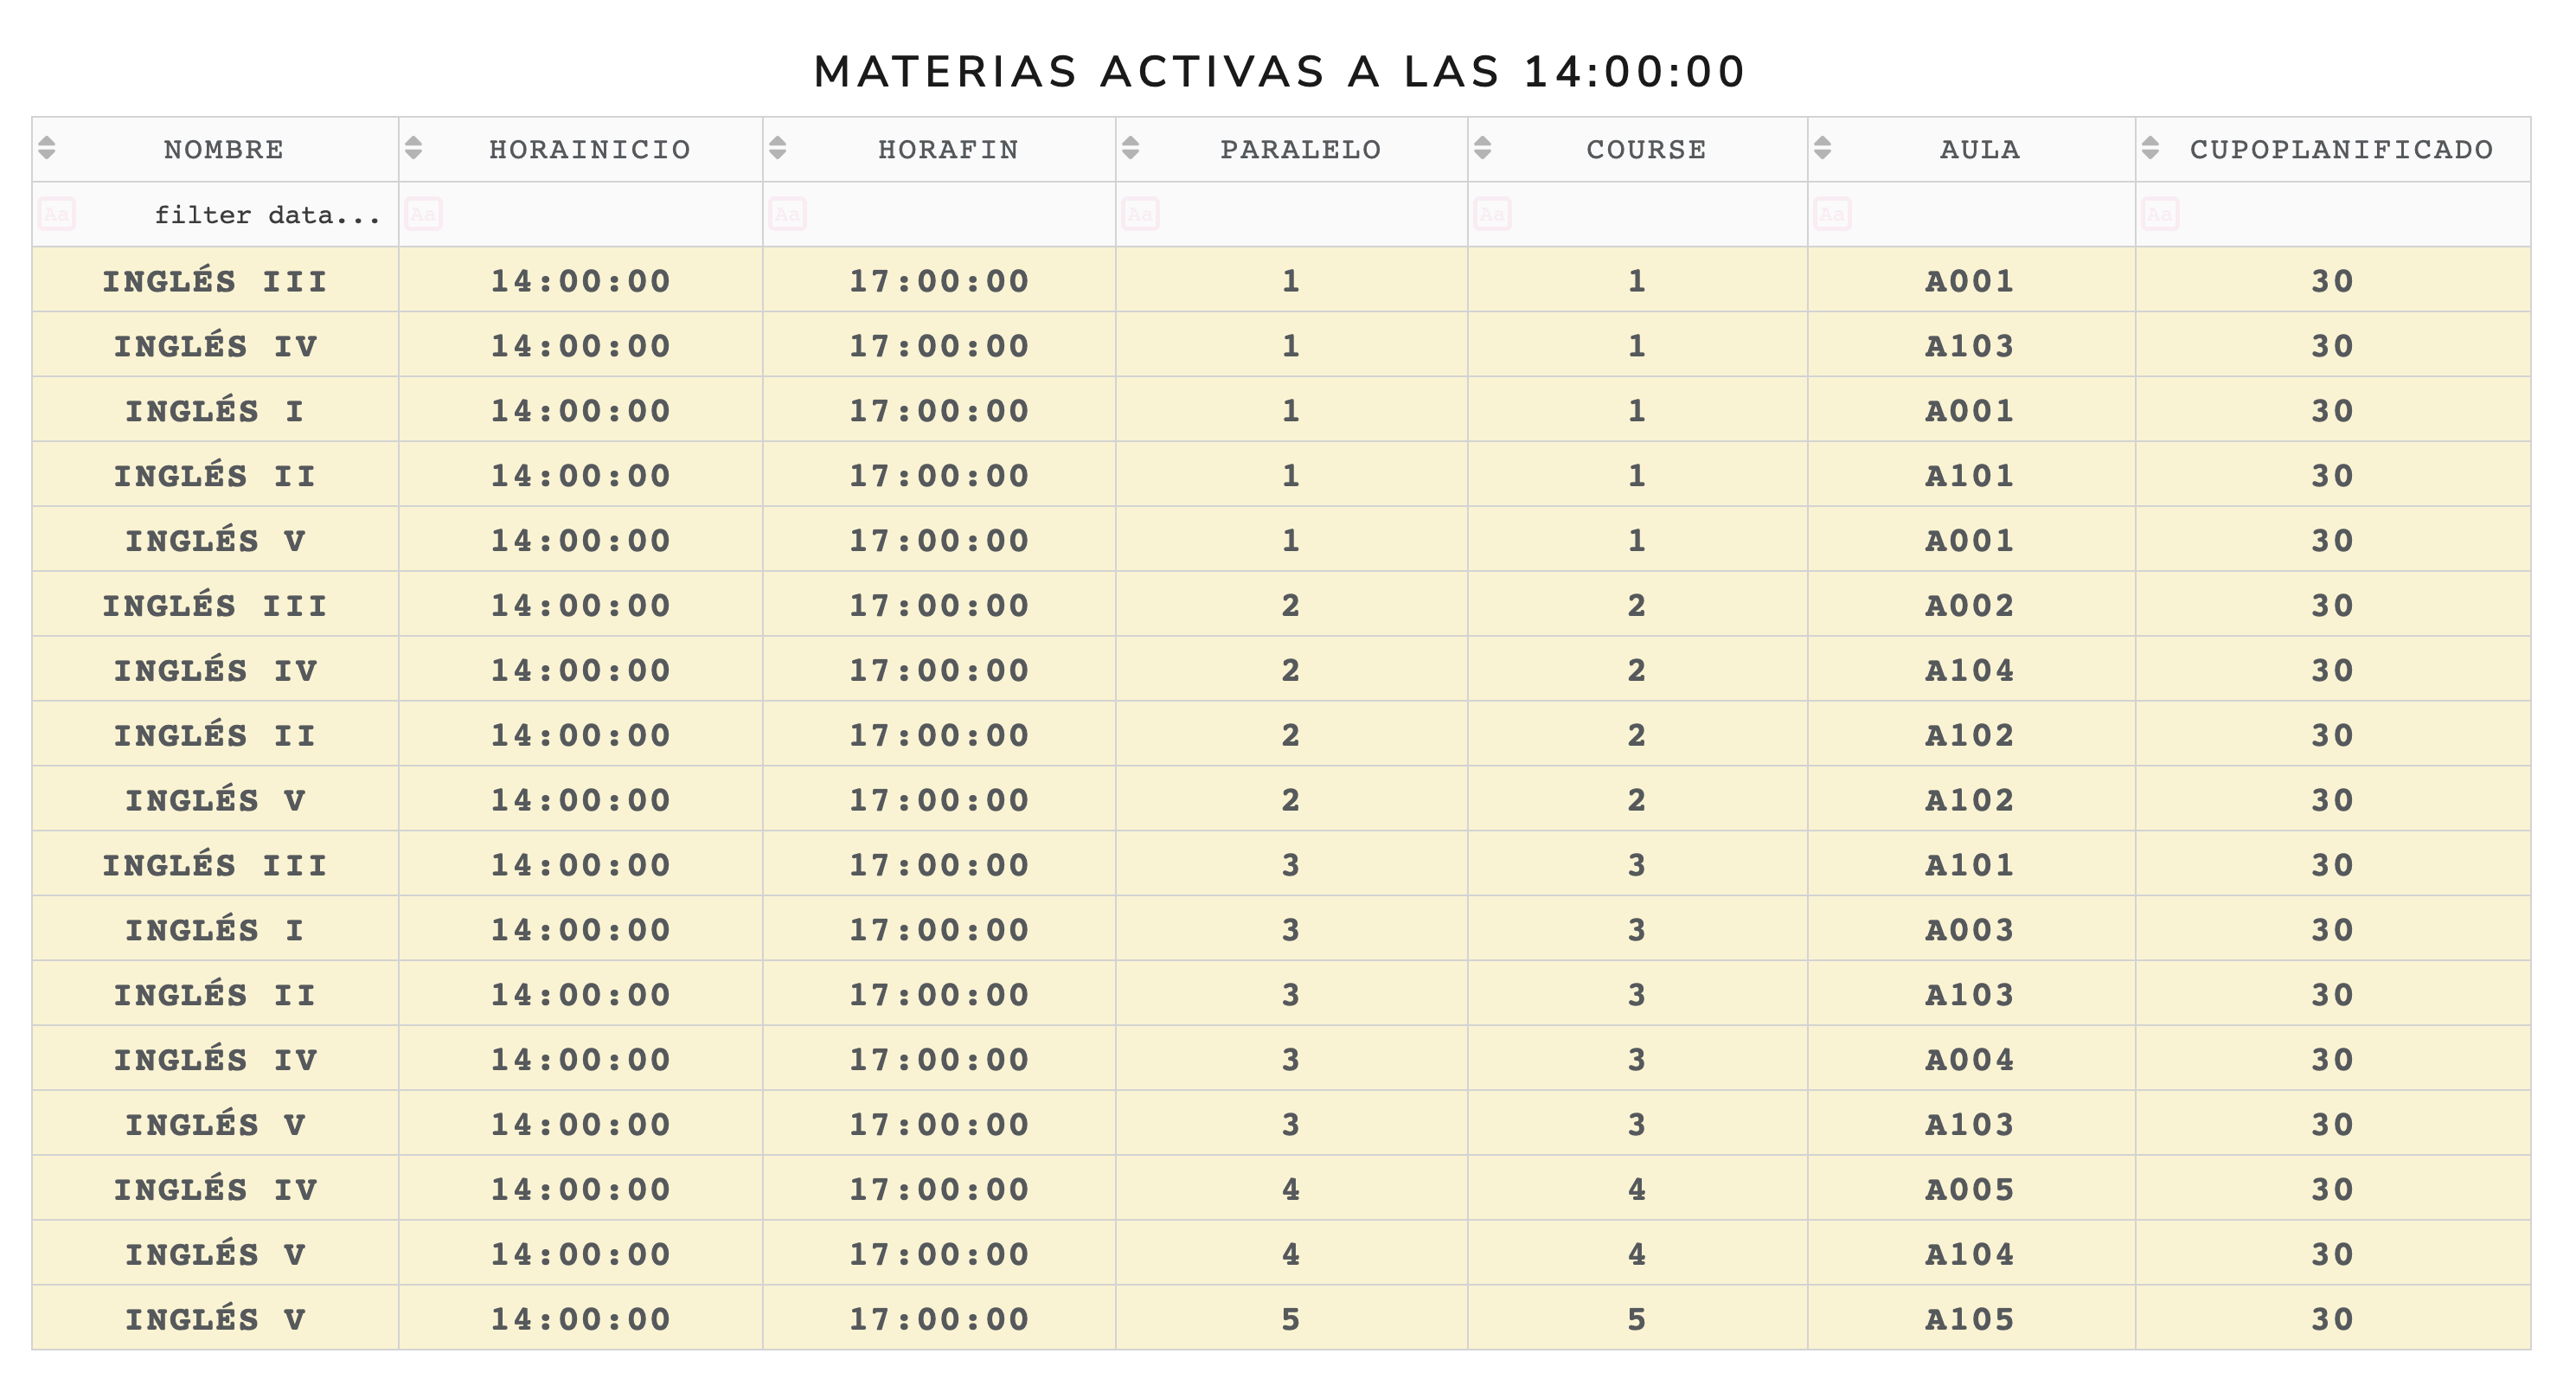

In [ ]:
from PIL import Image
img = Image.open('../../Dashboard/assets/Imagenes_slytheryn/FCSH.png')
img

In [ ]:
for dia  in ['lunes','martes','miércoles','jueves']:
    fig_dia= get_linegraph(dia)
    fig_dia.show()

### Top 5 paralelos con mas cupos

Muestra el top 5 de los paralelos con más cupos en ESPOL en el término 0S.

A destacar:

* La facultad con paralelos con más cupos es la llamada 'ESCUELA SUPERIOR POLITECNICA DEL LITORAL'
* La materia con más paralelos es 'EMPRENDIMIENTO E INNOVACIÓN'

In [76]:
df_H6 = df_H_p[['UNIDAD', 'NOMBRE', 'BLOQUE', 'PARALELO', 'CUPOPLANIFICADO']].groupby(['UNIDAD', 'NOMBRE', 'BLOQUE', 'PARALELO', 'CUPOPLANIFICADO'], as_index=False).count()


In [128]:
dftop5_matpar = df_H6.sort_values('CUPOPLANIFICADO', ascending=False).iloc[:5].drop(columns='BLOQUE')
dftop5_matpar

#Tabla del top 5 

,UNIDAD,NOMBRE,PARALELO,CUPOPLANIFICADO
0,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,2,38
2,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,1,38
3,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,101,38
1,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,102,38
55,Facultad de Ingeniería en Electricidad y Compu...,FUNDAMENTOS DE PROGRAMACIÓN,101,35


### Total de estudiantes por facultad

Muestra el total de estudiantes por cada facultad en ESPOL en el término 0S.

A destacar:

* La facultad  con más cupos es 'Facultad de Ciencias Sociales y Humanísticas'
* La facultad  con menos cupos es 'Facultad de Ciencias de la Vida'
* La media de cupos es 338.6
* La facultad 'Facultad de Ciencias Sociales y Humanísticas'tiene una demanda excesiva de cupos 

In [117]:
df_H10 = df_H_p[['UNIDAD', 'NOMBRE', 'BLOQUE', 'PARALELO', 'CUPOPLANIFICADO']].groupby(['UNIDAD', 'NOMBRE', 'BLOQUE', 'PARALELO', 'CUPOPLANIFICADO'], as_index=False).count()
df_H11 = df_H10.drop(columns=['PARALELO', 'BLOQUE', 'NOMBRE'])


In [120]:
df_estfac = df_H11.groupby(['UNIDAD'], as_index=False).sum(numeric_only=True).sort_values("CUPOPLANIFICADO", ascending=False)
df_estfac

,UNIDAD,CUPOPLANIFICADO
2,Facultad de Ciencias Sociales y Humanísticas,1020
1,Facultad de Ciencias Naturales y Matemáticas,271
4,Facultad de Ingeniería en Electricidad y Compu...,190
0,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,152
3,Facultad de Ciencias de la Vida,60


In [121]:
fig_estfac = px.bar(df_estfac, x='UNIDAD', y='CUPOPLANIFICADO', text_auto=True)
fig_estfac.show()

In [142]:
fig_box1 = go.Figure()
fig_box1.add_trace(go.Box(y=tuple(df_estfac.CUPOPLANIFICADO), boxmean=True))
fig_box1.show()

### Top cantidad de paralelos en facultades



A destacar:

* La facultad  con más paralelos es 'Facultad de Ciencias Sociales y Humanísticas'
* La facultad  con menos paralelos es 'Facultad de Ciencias de la Vida'
* La facultad 'Facultad de Ciencias Sociales y Humanísticas' tiene una cantidad de paralelos más altas que las demás facultades

In [78]:
top_facpar = df_H6[['UNIDAD']].groupby(['UNIDAD'], as_index=False).value_counts().rename(columns={'count':'TOTALMATERIAS'}).sort_values('TOTALMATERIAS', ascending=False)
top_facpar 

,UNIDAD,TOTALMATERIAS
2,Facultad de Ciencias Sociales y Humanísticas,34
4,Facultad de Ingeniería en Electricidad y Compu...,10
1,Facultad de Ciencias Naturales y Matemáticas,9
3,Facultad de Ciencias de la Vida,7
0,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,4


In [79]:
fig_facpar = px.bar(top_facpar, x = 'UNIDAD', y = 'TOTALMATERIAS', text_auto=True)
fig_facpar.show()

### Top 10 materias con mas paralelos 


A destacar:

* Las materias de inglés son las materias con más paralelos, teniendo estas una alta demanda.


In [122]:
top_maspar = df_H6[['UNIDAD', 'NOMBRE']].groupby(['UNIDAD', 'NOMBRE'], as_index=False).value_counts().sort_values('count', ascending=False).iloc[:10].rename(columns={'count':'PARALELOS'})
top_maspar

,UNIDAD,NOMBRE,PARALELOS
10,Facultad de Ciencias Sociales y Humanísticas,INGLÉS V,10
9,Facultad de Ciencias Sociales y Humanísticas,INGLÉS IV,8
8,Facultad de Ciencias Sociales y Humanísticas,INGLÉS III,6
7,Facultad de Ciencias Sociales y Humanísticas,INGLÉS II,6
6,Facultad de Ciencias Sociales y Humanísticas,INGLÉS I,4
15,Facultad de Ingeniería en Electricidad y Compu...,PRINCIPIOS DE ELECTRÓNICA,4
0,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,EMPRENDIMIENTO E INNOVACIÓN,4
16,Facultad de Ingeniería en Electricidad y Compu...,SISTEMAS DIGITALES I,4
13,Facultad de Ciencias de la Vida,TÉCNICAS DIETÉTICAS,3
5,Facultad de Ciencias Naturales y Matemáticas,ÁLGEBRA LINEAL,2


In [123]:
fig_maspar = px.bar(top_maspar, x = 'NOMBRE', y='PARALELOS', text_auto=True )
fig_maspar.show()

### Top materias por facultades


In [82]:
df_H8 = df_H_p[['UNIDAD', 'NOMBRE']].groupby(['UNIDAD', 'NOMBRE'], as_index=False).count()
top5_matfac = df_H8[['UNIDAD']].groupby(['UNIDAD'],as_index=False).value_counts().sort_values('count', ascending=False).rename(columns={'count':'TOTAL MATERIAS'})
top5_matfac

,UNIDAD,TOTAL MATERIAS
1,Facultad de Ciencias Naturales y Matemáticas,5
2,Facultad de Ciencias Sociales y Humanísticas,5
3,Facultad de Ciencias de la Vida,3
4,Facultad de Ingeniería en Electricidad y Compu...,3
0,ESCUELA SUPERIOR POLITECNICA DEL LITORAL,1


In [84]:
fig_matfac = px.bar(top5_matfac, x = 'UNIDAD', y= 'TOTAL MATERIAS', text_auto= True)
fig_matfac.show()

### Total de paralelos distribuidos por facultad y día 

In [85]:
df_H9 = df_H_p[['UNIDAD', 'NOMBRE', 'BLOQUE', 'PARALELO', 'DIA', 'CUPOPLANIFICADO']].groupby(['UNIDAD', 'NOMBRE', 'BLOQUE', 'PARALELO', 'DIA', 'CUPOPLANIFICADO'], as_index=False).count()

In [86]:
df_facmat_line  = df_H9[['UNIDAD', 'DIA']].groupby(['UNIDAD', 'DIA'], as_index=False).value_counts().sort_values('count', ascending=False).rename(columns={'count':'TOTAL'})
df_facmat_line

,UNIDAD,DIA,TOTAL
8,Facultad de Ciencias Sociales y Humanísticas,martes,34
9,Facultad de Ciencias Sociales y Humanísticas,miércoles,17
7,Facultad de Ciencias Sociales y Humanísticas,lunes,17
5,Facultad de Ciencias Naturales y Matemáticas,martes,7
13,Facultad de Ingeniería en Electricidad y Compu...,jueves,6
16,Facultad de Ingeniería en Electricidad y Compu...,miércoles,6
6,Facultad de Ciencias Naturales y Matemáticas,miércoles,5
4,Facultad de Ciencias Naturales y Matemáticas,lunes,5
14,Facultad de Ingeniería en Electricidad y Compu...,lunes,5
15,Facultad de Ingeniería en Electricidad y Compu...,martes,5


In [87]:
dia_ord(df_facmat_line)
df_facmat_line = df_facmat_line.sort_values('AUX_DIA')

In [88]:
fig_facmat = px.bar(df_facmat_line, x ='DIA', y = 'TOTAL', color='UNIDAD', barmode='group', text_auto=True, title='Paralelos')
fig_facmat.show()

In [89]:
fig_facmat_line = px.line(df_facmat_line, x ='DIA', y = 'TOTAL', color='UNIDAD')
fig_facmat_line.show()

### Boxplot de paralelos por día

Insight aún en desarrollo (para la clase)

Muestra la distribuciones de los paralelos por día en toda la universidad en el término 0S

In [141]:
fig_box2 = go.Figure()
fig_box2.add_trace(go.Box(y=tuple(df_facmat_line.TOTAL), x=tuple(df_facmat_line.DIA), boxmean=True))
fig_box2.show()